In [96]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

In [97]:
# PART A
x_i_raw = np.genfromtxt('./ass1_data/linearX.csv', delimiter=',')
y_i = np.genfromtxt('./ass1_data/linearY.csv', delimiter=',')
theta = np.array([0.00, 0.00])
m = x_i_raw.size
n = 1.95

# Normalize data
mean = 0
squared_sum = 0
for xi in x_i_raw:
    mean += xi
    squared_sum += xi*xi
mean = mean/m
e_x_squared = squared_sum/m
variance = e_x_squared - mean*mean

x_i_norm = np.array([(xi-mean)/variance for xi in x_i_raw])
x_i = np.array([[xi, 1] for xi in x_i_norm])
# print (x_i_norm)

In [98]:
# Detect Convergence
epsilon = 0.00000001
def converged(theta_next, theta):
    converged = True
    for d in range(theta.size):
        converged = converged and abs(theta_next[d] - theta[d]) < epsilon
    return converged

# Update Graph for PART C
def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

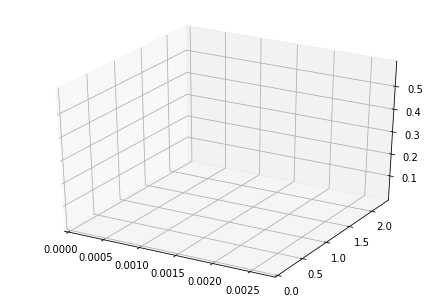

[0.00230932 0.9966201 ]
373


In [99]:
# Gradient Descent
num_iterations = 0
total_iterations = 10

theta_0, theta_1, error_func = [], [], []
curve = []

fig = plt.figure()
ax = p3.Axes3D(fig)

while(True):
    theta_next = np.array([0.00, 0.00])
    j_theta = 0
    for j in range(theta.size):
        sum = 0
        for i in range(m):
            hyp = np.dot(theta, x_i[i])
            sum = sum + x_i[i][j]*(y_i[i] - hyp)
            j_theta = j_theta + (y_i[i] - hyp)*(y_i[i] - hyp)
        theta_next[j] = theta[j] + n*sum/m
        
    if (converged(theta_next, theta)):
        break
        
    j_theta = j_theta/(4*m)
    theta_0.append(theta[0])
    theta_1.append(theta[1])
    error_func.append(j_theta)
    
    theta = theta_next
    num_iterations += 1
    
# Set Axes Properties
theta_0_min, theta_0_max = 0.8*min(theta_0), 1.2*max(theta_0)
theta_1_min, theta_1_max = 0.8*min(theta_1), 1.2*max(theta_1)
error_func_min, error_func_max = 0.8*min(error_func), 1.2*max(error_func)
ax.set_xlim3d([theta_0_min, theta_0_max])
ax.set_ylim3d([theta_1_min, theta_1_max])
ax.set_zlim3d([error_func_min, error_func_max])

# Plot error curve versus parameters
curve = [np.array([theta_0, theta_1, error_func])]
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in curve]
ani = animation.FuncAnimation(fig, update_lines, num_iterations-1, fargs=(curve, lines), interval=200, blit=True)
plt.show()

print (theta)
print (num_iterations)

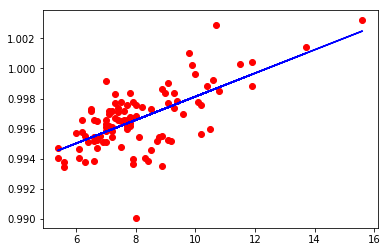

In [100]:
# PART B
# Plot Graphs
h_theta = np.array([np.dot(theta, xi) for xi in x_i])
plt.plot(x_i_raw, y_i, 'ro')
plt.plot(x_i_raw, h_theta, 'b-')